In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

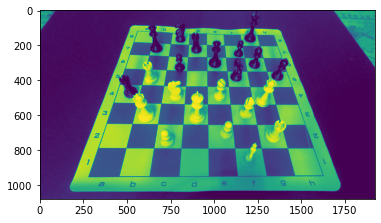

In [78]:
def cut_to_relevant_time(path:str)->None:
    """
    this function takes raw video file and cuts it to
    relevant frames of chess game and writes
    :param path:
    :return:
    """
    pass

def keep_frames_for_analysis(path:str)->None:
    """
    this function takes the video file and keeps images with 81
    intersections of lines
    :param path:
    :return:
    """
    pass

def analize_first_frame (image)->dict:
    """
    this function takes a single frame and separates it into squares,
    returns a dictionary of pieces by location
    :param image:
    :return:
    """
    pass

def find_81_point(image)->dict:
    """

    :param image:
    :return:{'a1':((x,y),(x,y),(x,y),(x,y)),'h8':((x,y),(x,y),(x,y),(x,y))}
    """
    image = cv2.imread(image)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image)
    edges = cv2.Canny(gray_image,50,150,apertureSize = 3)
    lines = cv2.HoughLines(edges,2,np.pi/180,300)
    lines = lines.reshape(-1,2)
    for rho,theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

    cv2.imwrite('lines.jpg',image)
    return lines

def find_top_2_changes(image1,coord1:dict,image2,coord2:dict)->tuple:
    """
    this function returns the bord locations that changed - from result[0]
    to result[1]
    :param image1:
    :param coord1:
    :param image2:
    :param coord2:
    :return:
    """
    pass

lines = find_81_point('data/alpha_data_image47.jpeg')